#DMML Final Project
##Hayden Richards
##5/2/2023
This File is for the sentiment analysis of steam game reviews using word embeddings and other methods.

#Project Progress Update

On further inspection of my dataset of videogame reviews I relized that the initial dataset was too large to work on in Colab, because of this I swapped to a different data set of movie reviews. This dataset carries less information but does contain the 2 things I need for the main purpose of my project (a description and positive or negative attribute). In this file I should have a completed cleaning data for training and a Word2Vec model made off of that data. (The data can be found here https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

#Data Frame Set Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

In [ ]:
#df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Word Embeddings

In [4]:
#imports
from gensim.models import Word2Vec
import bs4 as bs
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.decomposition import PCA

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Word2Vec wants an input as a list of words and not a string so the review column needs to be edited. When looking for the ideal input for the Word2Vec class I found some cleaning recommendations at https://datamahadev.com/word2vec-implementation-using-python-gensim-and-google-colab/.

In [5]:
def clean(s):
  #fix the text
  pa = s.lower()
  pa = re.sub('[^a-zA-Z]', ' ', pa)
  pa = re.sub('\s+', ' ', pa)
  #turns the strings into lists
  alls = nltk.sent_tokenize(pa)
  allw = [nltk.word_tokenize(sent) for sent in alls]
  #removing stopwords
  #for i in range(len(allw)):
    #allw[i] = [w for w in allw[i] if w not in stopwords.words('english')]
  return allw

In [6]:
corpus = []
for i in df['review']:
  corpus += clean(i)

In [7]:
#fix the text in the original data set so it matches the Word2Vec output
def fix(s):
  pa = s.lower()
  pa = re.sub('[^a-zA-Z]', ' ', pa)
  pa = re.sub('\s+', ' ', pa)
  return pa

In [8]:
df['review'] = df['review'].apply(fix)

In [ ]:
#model = Word2Vec(corpus)

In [ ]:
#print(model)

Word2Vec<vocab=39126, vector_size=100, alpha=0.025>


In [9]:
lalph = list(map(chr, range(97, 123)))

In [10]:
lalph.pop(8)
lalph.pop(0)

'a'

In [ ]:
#The initial model contains words like br and blahblahblah that aren't actual words si they need to be removed
#model.wv.most_similar('embarassing', top = 10)

In [38]:
remove = ['br', 'ps', 'mon', 'cr', 'kk', 'gh', 'wm', 'od', 'ck', 'cq', 'ld', 'rr', 'pt', 'tt', 'nb', 'os', 'ic', 'nm', 'sf', 'blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah']
remove = remove + lalph

In [39]:
corpus2 = []
for review in corpus:
  sent = []
  for word in review:
    if word not in remove:
      sent.append(word)
  corpus2.append(sent)

In [40]:
model = Word2Vec(corpus2)

In [ ]:
#words = list(model.wv.key_to_index)
#print(words)

['movie', 'film', 'one', 'like', 'good', 'time', 'even', 'would', 'story', 'really', 'see', 'well', 'much', 'bad', 'get', 'people', 'great', 'also', 'first', 'made', 'make', 'way', 'could', 'movies', 'characters', 'think', 'watch', 'character', 'films', 'two', 'many', 'seen', 'love', 'plot', 'never', 'life', 'acting', 'show', 'best', 'know', 'little', 'ever', 'man', 'better', 'end', 'scene', 'still', 'say', 'scenes', 'something', 'go', 'back', 'real', 'thing', 'watching', 'actors', 'director', 'years', 'funny', 'though', 'old', 'another', 'work', 'actually', 'nothing', 'makes', 'look', 'find', 'going', 'new', 'lot', 'every', 'part', 'world', 'cast', 'us', 'things', 'want', 'quite', 'pretty', 'horror', 'got', 'around', 'seems', 'young', 'take', 'big', 'however', 'thought', 'fact', 'enough', 'long', 'give', 'may', 'comedy', 'series', 'must', 'right', 'action', 'music', 'without', 'guy', 'times', 'saw', 'original', 'always', 'role', 'come', 'almost', 'gets', 'point', 'interesting', 'done'

In [ ]:
#print(model)

Word2Vec<vocab=39089, vector_size=100, alpha=0.025>


In [ ]:
#model.wv.most_similar('film')

[('movie', 0.8351247310638428),
 ('films', 0.6328814029693604),
 ('flick', 0.6060888171195984),
 ('documentary', 0.5751122832298279),
 ('movies', 0.5422925353050232),
 ('thriller', 0.5318276882171631),
 ('picture', 0.5298734307289124),
 ('cinema', 0.5253233313560486),
 ('nevertheless', 0.48626968264579773),
 ('masterpiece', 0.4732544422149658)]

In [ ]:
#using PCA to visualize the model
#pca = PCA(n_components = 2)
#out = pca.fit_transform(model.wv[model.wv.key_to_index])

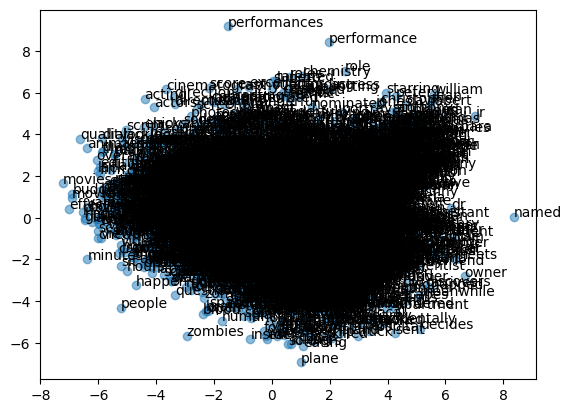

In [ ]:
#a graph with labeled points and an obvious mess
#plt.scatter(out[:, 0], out[:, 1], alpha=.5)
#for i, word in enumerate(words):
# plt.annotate(word, xy=(out[i, 0], out[i, 1]))
#plt.show()

In [14]:
#apply the previous remove list to the original dataframe
for index in range(len(corpus2)):
  sent = ''
  for word in corpus2[index]:
    sent += word
    sent +=' '
  df.loc[index, 'review'] = sent

In [18]:
m = {'positive': 1,
     'negative': 0}

df['sentiment'] = df['sentiment'].map(m)

In [19]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there a family where a little boy ja...,0
4,petter mattei love in the time of money is a v...,1


In [20]:
from wordcloud import WordCloud

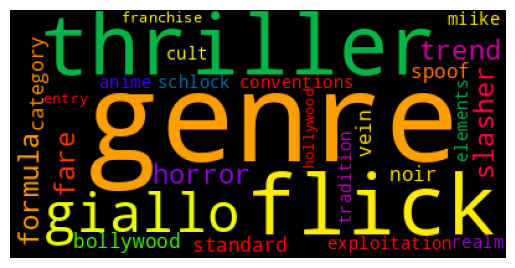

In [41]:
word = 'genre'
l = model.wv.most_similar(word, topn = 29)

wcwords = word + " "
for i in l:
  wcwords += i[0]
  wcwords += " "

text = " ".join(i for i in wcwords)
cloud = WordCloud( colormap='prism').generate(wcwords)

plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
model.wv.most_similar('film', topn = 24)

In [ ]:
#create copies of the data set so that the original is perserved through the use of different models
dfa1 = df.copy()
dfa2 = df.copy()
dfa3 = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split

#Sentiment Analysis Attempt 1

In [ ]:
dfa1['comp1'] = 0
dfa1['comp2'] = 0
dfa1['comp3'] = 0
dfa1['comp4'] = 0

In [ ]:
pca = PCA(n_components = 4)
index = 0
for review in corpus2:
  vectors = []
  for word in review:
    try:
      vectors.append(model.wv[word])
    except:
      pass
  output = pca.fit_transform(vectors)
  comp1 = 0
  comp2 = 0
  comp3 = 0
  comp4 = 0
  for i in output:
    comp1 += i[0]
    comp2 += i[1]
    comp3 += i[2]
    comp4 += i[3]
  comp1 = comp1 / len(output)
  comp2 = comp2 / len(output)
  comp3 = comp3 / len(output)
  comp4 = comp4 / len(output)
  dfa1.loc[index, 'comp1'] = comp1
  dfa1.loc[index, 'comp2'] = comp2
  dfa1.loc[index, 'comp3'] = comp3
  dfa1.loc[index, 'comp4'] = comp4
  index += 1

In [ ]:
#To start off I want to try a traditional model that we went over in class
X = dfa1.drop('review', axis=1)
X = X.drop('sentiment', axis=1)
y = dfa1[['sentiment']].copy()

In [ ]:
m = {'positive': 1,
       'negative': 0}

y['sentiment'] = y['sentiment'].map(m)

In [ ]:
min = X['comp1'].min()
max = X['comp1'].max()
X['comp1'] = (X['comp1'] - min) / (max - min)
min = X['comp2'].min()
max = X['comp2'].max()
X['comp2'] = (X['comp2'] - min) / (max - min)
min = X['comp3'].min()
max = X['comp3'].max()
X['comp3'] = (X['comp3'] - min) / (max - min)
min = X['comp4'].min()
max = X['comp4'].max()
X['comp4'] = (X['comp4'] - min) / (max - min)

In [ ]:
X['comp1'] = X['comp1'].round(5)
X['comp2'] = X['comp2'].round(5)
X['comp3'] = X['comp3'].round(5)
X['comp4'] = X['comp4'].round(5)

In [ ]:
X.head()

,comp1,comp2,comp3,comp4
0,0.50706,0.51980,0.47865,0.42584
1,0.55275,0.58883,0.56762,0.37631
2,0.58572,0.48861,0.52347,0.40871
3,0.58040,0.56596,0.59157,0.35767
4,0.54277,0.44650,0.49019,0.44218


In [ ]:
y.head()

,sentiment
0,1
1,1
2,1
3,0
4,1


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .5, random_state = 0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
#param_grid = {#'n_estimators': np.arange(30, 36, 1),
#              'max_depth': np.arange(65, 75, 1),
#              #'learning_rate': np.arange(0.01, 0.015, 0.001)
#              }

#grid = GridSearchCV(XGBClassifier(n_estimators = 33, learning_rate = .012), param_grid, cv=5, verbose=1)
#
#grid.fit(Xtrain, ytrain)
#
#print(grid.best_params_)
#print(grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 71}
0.50724


In [ ]:
gradboost = XGBClassifier(n_estimators = 33, learning_rate = .012, max_depth = 71)

gradboost.fit(Xtrain, ytrain)

ypred = gradboost.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred)
print(acc)

0.5102


#Sentiment Analysis Attempt 2

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Activation
from keras.layers import Flatten,Input
from keras.layers import Embedding
from keras.layers import concatenate
from keras.utils import to_categorical
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
m = {'positive': 1,
    'negative': 0}

In [ ]:
dfa2['sentiment'] = dfa2['sentiment'].map(m)

In [ ]:
dfa2.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there a family where a little boy ja...,0
4,petter mattei love in the time of money is a v...,1


In [ ]:
df_review = dfa2['review']

In [ ]:
(count, col) = dfa2.shape
rev = []
for i in range(0, count):
  rev.append(df_review[i])

In [ ]:
max_words = 40000
max_seq = 100

token = Tokenizer(num_words=max_words)
token.fit_on_texts(rev)
sequ = token.texts_to_sequences(rev)

word_index = token.word_index
print(len(word_index))

data = pad_sequences(sequ, maxlen = max_seq)

99378


In [ ]:
y = pd.get_dummies(dfa2['sentiment'])

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=.25, random_state=0)

[nSamp, inpSamp] = Xtrain.shape

In [ ]:
vocab = token.sequences_to_texts(rev)

vocab_size = len(token.word_index) + 1
print(vocab_size)

embedding_matrix = np.zeros((vocab_size, 100))

for i in token.word_index.items():
  try:
    embedding_vector = model[word]
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  except:
    pass

99379


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 review_input (InputLayer)   [(None, 100)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 100, 100)          9937900   
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               1000100   
                                                                 
 dense_13 (Dense)            (None, 32)                3232      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 10,941,298
Trainable params: 10,941,298
Non-t

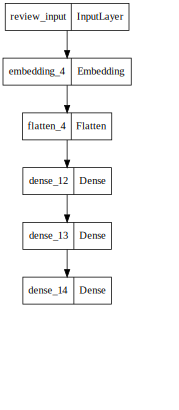

In [ ]:
Sent = Sequential()

embed = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(max_seq,), trainable=True)

review_input = Input(shape=(max_seq,), dtype='int32', name = 'review_input')
review_embed = embed(review_input)
Flatten_Layer = Flatten()
review_flatten = Flatten_Layer(review_embed)

dense1 = Dense(100, activation='relu')(review_flatten)
dense2 = Dense(32, activation='relu')(dense1)
predict = Dense(2,activation='softmax')(dense2)

Sent = Model(inputs=[review_input], outputs=[predict])
Sent.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

print(Sent.summary())
SVG(model_to_dot(Sent).create(prog='dot', format='svg'))

In [ ]:
Sent.fit(Xtrain, ytrain, epochs=5, batch_size=32, verbose=True, validation_data=(Xtest, ytest))

Epoch 1/5
1172/1172 [==============================] - 282s 240ms/step - loss: 0.6932 - acc: 0.4967 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 2/5
1172/1172 [==============================] - 281s 239ms/step - loss: 0.6932 - acc: 0.4999 - val_loss: 0.6933 - val_acc: 0.4967
Epoch 3/5
1172/1172 [==============================] - 279s 238ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 4/5
1172/1172 [==============================] - 282s 241ms/step - loss: 0.6932 - acc: 0.4971 - val_loss: 0.6932 - val_acc: 0.4967
Epoch 5/5
1172/1172 [==============================] - 280s 239ms/step - loss: 0.6931 - acc: 0.5052 - val_loss: 0.6933 - val_acc: 0.4967


#Sentiment Analysis Attempt 3

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [ ]:
f = open(file='./glove.6B.100d.txt')
embed_index = dict()
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embed_index[word] = coefs
f.close()
vocab = token.sequences_to_texts(rev)
vocab_size = len(token.word_index) + 1

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in token.word_index.items():
  try:
    embedding_vector = embed_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  except:
    pass

In [ ]:
m = {'positive': 1,
    'negative': 0}
dfa2['sentiment'] = dfa2['sentiment'].map(m)

In [ ]:
df_review = dfa3['review']

In [ ]:
#using the same data and y value from the previous attempt
Xtrain, Xtest, ytrain, ytest = train_test_split(data, y, test_size=.25, random_state=0)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 review_input (InputLayer)   [(None, 100)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 100, 100)          9937900   
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 100)               1000100   
                                                                 
 dense_16 (Dense)            (None, 32)                3232      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 10,941,298
Trainable params: 10,941,298
Non-t

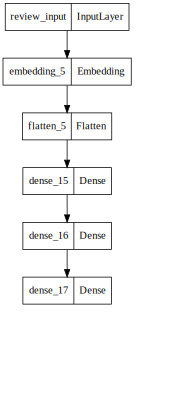

In [ ]:
Sent = Sequential()

embed = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=(max_seq,), trainable=True)

review_input = Input(shape=(max_seq,), dtype='int32', name = 'review_input')
review_embed = embed(review_input)
Flatten_Layer = Flatten()
review_flatten = Flatten_Layer(review_embed)

dense1 = Dense(100, activation='relu')(review_flatten)
dense2 = Dense(32, activation='relu')(dense1)
predict = Dense(2,activation='softmax')(dense2)

Sent = Model(inputs=[review_input], outputs=[predict])
Sent.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

print(Sent.summary())
SVG(model_to_dot(Sent).create(prog='dot', format='svg'))

In [ ]:
Sent.fit(Xtrain, ytrain, epochs=5, batch_size=32, verbose=True, validation_data=(Xtest, ytest))

Epoch 1/5
1172/1172 [==============================] - 298s 253ms/step - loss: 0.4677 - acc: 0.7710 - val_loss: 0.3898 - val_acc: 0.8249
Epoch 2/5
1172/1172 [==============================] - 296s 253ms/step - loss: 0.2551 - acc: 0.8941 - val_loss: 0.4196 - val_acc: 0.8280
Epoch 3/5
1172/1172 [==============================] - 298s 254ms/step - loss: 0.1149 - acc: 0.9564 - val_loss: 0.5373 - val_acc: 0.8014
Epoch 4/5
1172/1172 [==============================] - 299s 255ms/step - loss: 0.0318 - acc: 0.9889 - val_loss: 0.7531 - val_acc: 0.8220
Epoch 5/5
1172/1172 [==============================] - 299s 255ms/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.9548 - val_acc: 0.8246
